<a href="https://colab.research.google.com/github/Ajeet-18/Machine-Learning/blob/main/Data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a Python code to implement Linear Regression for multi-dimensional input and one-dimensional output using Matrix Inverse.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from matplotlib import pyplot as pl

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import plotly.express as px

In [ ]:
df = pd.read_csv('Data1.csv')

In [ ]:
df

,x,y
0,0.1,8.298133
1,0.2,4.919282
2,0.3,4.145139
3,0.4,6.850788
4,0.5,6.375323
...,...,...
95,9.6,28.420698
96,9.7,27.984652
97,9.8,30.336851
98,9.9,30.376285


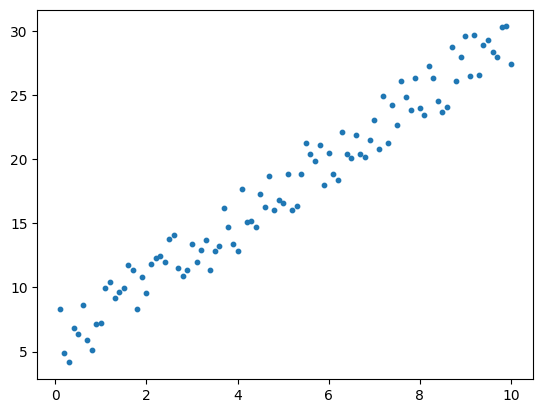

In [ ]:
# Extract the 'x' and 'y' columns from the DataFrame and convert them to lists
X = [float(item) for item in list(df['x'])]
Y = [float(item) for item in list(df['y'])]

# Scatter plot of the data points using Matplotlib
plt.scatter(X, Y, s=5)

# Display the plot
plt.show()

In [ ]:
# Initialize lists to store the results of calculations
XY = []
X_square = []

# Loop through the first 100 elements of X and Y
for i in range(100):
    # Calculate the product of X[i] and Y[i] and append it to XY
    product = X[i] * Y[i]
    XY.append(product)

    # Calculate the square of X[i] and append it to X_square
    square = X[i] ** 2
    X_square.append(square)

# Calculate the averages of XY, X, Y, and X_square
average_XY = np.mean(XY)
average_X = np.mean(X)
average_Y = np.mean(Y)
average_X_square = np.mean(X_square)

# Display the calculated averages
print("Average of XY:", average_XY)
print("Average of X:", average_X)
print("Average of Y:", average_Y)
print("Average of X_square:", average_X_square)

Average of XY: 109.352647325189
Average of X: 5.05
Average of Y: 17.72029046035
Average of X_square: 33.83500000000001


In [ ]:
# Calculate the slope (m) using the least squares method
numerator = average_XY - average_X * average_Y
denominator = average_X_square - average_X ** 2
m = numerator / denominator

# Calculate the y-intercept (c) using the calculated slope
c = average_Y - m * average_X

# Display the values of slope (m) and y-intercept (c)
print("Value of slope (m):", m)
print("Value of y-intercept (c):", c)

Value of slope (m): 2.384060066057183
Value of y-intercept (c): 5.680787126761226


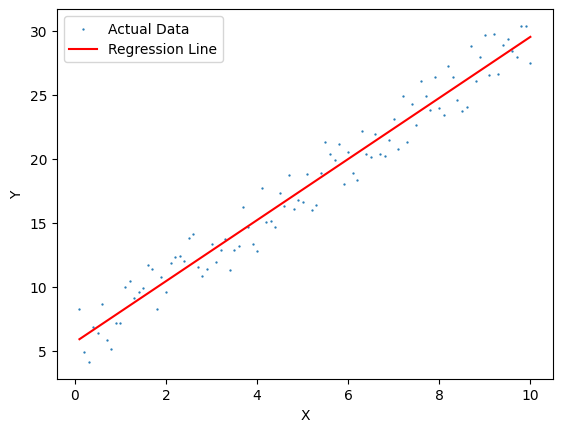

In [ ]:
# Initialize a list to store the predicted Y values
predicted_Y = []

# Loop through the first 100 elements of X to predict corresponding Y values
for i in range(100):
    # Use the equation of the line (Y = m * X + c) to calculate predicted Y
    predicted_value = m * X[i] + c
    predicted_Y.append(predicted_value)

# Plotting the graph; Given data set is scattered, but the predicted dataset is represented as a line.
plt.scatter(X, Y, s=0.4, label='Actual Data')  # Scatter plot for the actual data points
plt.plot(X, predicted_Y, label='Regression Line', color='red')  # Line plot for the predicted values

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()

# Verification

In [ ]:
# Using linear regression from scikit-learn
regr = LinearRegression()

# Reshape X and Y arrays to a 2D array for scikit-learn
x_array = np.array(X).reshape(-1, 1)
y_array = np.array(Y).reshape(-1, 1)

# Fit the linear regression model
regr.fit(x_array, y_array)

# Display the slope (coefficient) and intercept of the linear regression model
print("Slope (Coefficient): ", regr.coef_)
print("Intercept: ", regr.intercept_)

Slope (Coefficient):  [[2.38406007]]
Intercept:  [5.68078713]


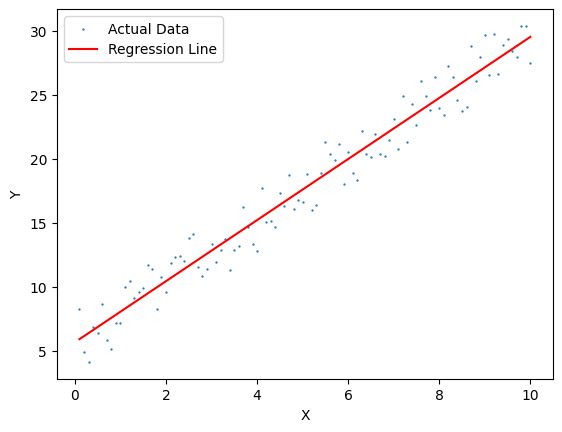

In [ ]:
# Predicting the values using the trained linear regression model
y_pred_array = regr.predict(x_array)
y_pred_list = list(y_pred_array.reshape(1, -1)[0])

# Plotting the scatter plot for the actual data points and the regression line for predicted values
plt.scatter(X, Y, s=0.4, label='Actual Data')  # Scatter plot for the actual data points
plt.plot(X, y_pred_list, label='Regression Line', color='red')  # Line plot for the predicted values

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Calculate error metrics between the predictions by the SKLearn regression model and the given data
mae = mean_absolute_error(y_true=y_array, y_pred=y_pred_array)
mse = mean_squared_error(y_true=y_array, y_pred=y_pred_array)
rmse = np.sqrt(mse)  # Calculate RMSE as the square root of MSE
# r_square = r2_score(y_array, y_pred_array)

# Display the calculated error metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
# print("R-Squared (r_square):", r_square)

Mean Absolute Error (MAE): 1.280555978429147
Mean Squared Error (MSE): 2.078525401777328
Root Mean Squared Error (RMSE): 1.4417091945941551


In [ ]:
# Calculate error metrics between the predictions by the custom regression model and the given data
mae = mean_absolute_error(y_true=y_array, y_pred=predicted_Y)
mse = mean_squared_error(y_true=y_array, y_pred=predicted_Y)
rmse = np.sqrt(mse)  # Calculate RMSE as the square root of MSE
# r_square = r2_score(y_array, predicted_Y)

# Display the calculated error metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
# print("R-Squared (r_square):", r_square)

Mean Absolute Error (MAE): 1.2805559784291467
Mean Squared Error (MSE): 2.0785254017773265
Root Mean Squared Error (RMSE): 1.4417091945941547


# Gradient Descent

In [ ]:
def gradient_descent(X, Y, learning_rate):
    """
    Performs gradient descent to find the optimal parameters (m, c) for a linear regression model.

    Parameters:
    - X: Input feature (independent variable)
    - Y: Output variable (dependent variable)
    - learning_rate: Step size for gradient descent

    Returns:
    - Tuple containing the optimized values for slope (m) and y-intercept (c)
    """

    # Initialize parameters
    n = len(Y)  # Total number of data points
    m = 0       # Initialize slope (m) with 0
    c = 0       # Initialize y-intercept (c) with 0

    # Perform gradient descent for a fixed number of epochs (iterations)
    for _ in range(1000):
        # Update slope (m)
        m_gradient = sum((c + m * X[i] - Y[i]) * X[i] for i in range(n))
        m -= learning_rate * (2 / n) * m_gradient

        # Update y-intercept (c)
        c_gradient = sum(c + m * X[i] - Y[i] for i in range(n))
        c -= learning_rate * (2 / n) * c_gradient

    return (m, c)

# Perform gradient descent with a learning rate of 0.01
optimized_params = gradient_descent(X, Y, 0.01)

# Display the optimized parameters (slope, y-intercept)
print("Optimized Parameters (m, c):", optimized_params)


Optimized Parameters (m, c): (2.3902331961190626, 5.639726026491245)


### Stochastic Gradient Descent

In [ ]:
def stochastic_gradient_descent(X, Y, learning_rate):
    """
    Performs stochastic gradient descent to find the optimal parameters (m, c) for a linear regression model.

    Parameters:
    - X: Input feature (independent variable)
    - Y: Output variable (dependent variable)
    - learning_rate: Step size for stochastic gradient descent

    Returns:
    - Tuple containing the optimized values for slope (m) and y-intercept (c)
    """

    # Initialize parameters
    n = len(Y)  # Total number of data points
    m = 0       # Initialize slope (m) with 0
    c = 0       # Initialize y-intercept (c) with 0
    k = 1       # Mini-batch size

    # Perform stochastic gradient descent for a fixed number of epochs (iterations)
    for _ in range(2000):
        j = len(Y)

        # Iterate through mini-batches
        while j > k:
            sum_m = 0

            # Update slope (m) using a mini-batch
            for i in range(k):
                i = j - i - 1
                q = c * X[i] + m * X[i] * X[i] - X[i] * Y[i]
                sum_m += q

            m_new = m - learning_rate * ((2 / n) * sum_m)
            m = m_new
            j = j - k

        j = len(Y)

        # Iterate through mini-batches
        while j > k:
            sum_c = 0

            # Update y-intercept (c) using a mini-batch
            for i in range(k):
                i = j - i - 1
                q = c + m * X[i] - Y[i]
                sum_c += q

            c_new = c - learning_rate * ((2 / n) * sum_c)
            c = c_new
            j = j - k

    return (m, c)

# Shuffle the data using random permutation
perm = np.random.permutation(len(Y))
sx = np.array(X)[perm]
sy = np.array(Y)[perm]

# Perform stochastic gradient descent with a learning rate of 0.01
optimized_params = stochastic_gradient_descent(sx, sy, 0.01)

# Display the optimized parameters (slope, y-intercept)
print("Optimized Parameters (m, c):", optimized_params)

Optimized Parameters (m, c): (2.358354961339667, 5.808405293020509)
